#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [ ]:
!pip install MiniSom

## Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


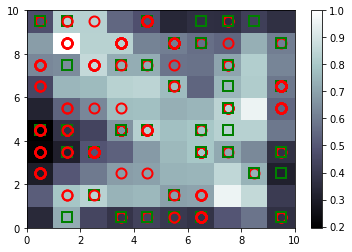

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [6]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5583067e+07, 1.0000000e+00, 2.1830000e+01, 2.5000000e-01,
        2.0000000e+00, 2.0000000e+00, 8.0000000e+00, 6.6500000e-01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5578722e+07, 1.0000000e+00, 1.9420000e+01, 1.5000000e+00,
        1.0000000e+00, 1.3000000e+01, 4.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 2.1000000e+01],
       [1.5591107e+07, 1.0000000e+00, 3.2000000e+01, 1.7500000e+00,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 4.0000000e-02,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 3.9300000e+02, 1.0000000e+00],
       [1.5588854e+07, 1.0000000e+00, 2.6000000e+01, 1.0000000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 1.7500000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

##Printing the Fraunch Clients

In [7]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15583067
15578722
15591107
15588854
15808662
15776545


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [10]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [12]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#Part 3 - ANN

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [14]:
import tensorflow as tf
tf.__version__

'2.3.1'

## Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [20]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0461 - accuracy: 0.9913
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0431 - accuracy: 0.9913
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0411 - accuracy: 0.9913
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0398 - accuracy: 0.9913
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0387 - accuracy: 0.9913
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0375 - accuracy: 0.9913
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0365 - accuracy: 0.9913
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0359 - accuracy: 0.9913
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0352 - accuracy: 0.9913
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0349 - accuracy: 0.9913

## Predicting test set results

In [21]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [22]:
print(y_pred)

[[1.57901130e+07 8.00881388e-13]
 [1.56058720e+07 5.11874321e-09]
 [1.57053790e+07 3.54055629e-08]
 ...
 [1.57683420e+07 7.13752732e-02]
 [1.57055060e+07 1.44031599e-01]
 [1.55830670e+07 2.59609014e-01]]
